In [ ]:
!pip install --upgrade nibabel

Get data


In [ ]:
!wget "https://putpoznanpl-my.sharepoint.com/:u:/g/personal/dominik_pieczynski_put_poznan_pl/EWIZ_xm8wXpMjQDgF2VQ1csB4QuHPKoj5vDpj6CQi9p-AA?e=yQr6fn&download=1" -O public.zip
!unzip -q public.zip
!rm public.zip

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Create valid dirs

In [ ]:
!mkdir /content/FirstDataset/valid
!mkdir /content/SecondDataset/valid

In [ ]:
!mkdir /content/FirstDataset/train2

Checking the number of scans in dirs 

In [ ]:
import os
import shutil

print("FirstDataset")
filepath1 = '/content/FirstDataset/train'
filenames1 = os.listdir(filepath1)
filenames1 = sorted(filenames1)
print('train', len(filenames1))
print('test', len(os.listdir('/content/FirstDataset/test')))
print(int(len(filenames1)/5)) #114

print("SecondDataset")
filepath2 = '/content/SecondDataset/train'
filenames2 = os.listdir(filepath2)
filenames2 = sorted(filenames2)
print('train', len(filenames2))
print('test', len(os.listdir('/content/SecondDataset/test')))
print(int(len(filenames2)/5)) # 20

FirstDataset
train 574
test 72
114
SecondDataset
train 100
test 25
20


In [ ]:
import os
import shutil
from pathlib import Path

# FirstDataset
filepath1 = Path('/content/FirstDataset/train')

train_X_1 = []
train_y_1 = []

for scan_path in sorted(filepath1.iterdir()):
  if scan_path.name.endswith('mask.nii.gz'):
    train_y_1.append(scan_path)
  else:
    train_X_1.append(scan_path)

print(len(train_X_1), train_X_1)
print(len(train_y_1), train_y_1)

# SecondDataset
filepath2 = Path('/content/SecondDataset/train')

train_X_2 = []
train_y_2 = []

for scan_path in sorted(filepath2.iterdir()):
    train_y_2.append(scan_path/'mask.nii.gz')
    train_X_2.append(scan_path/'T1w.nii.gz')

print(len(train_X_2), train_X_2)
print(len(train_y_2), train_y_2)



287 [PosixPath('/content/FirstDataset/train/011e40c2b1d3c9bb53bd9e5a7efd04ba.nii.gz'), PosixPath('/content/FirstDataset/train/0187e4cb2fb4971848c8981e9ece0849.nii.gz'), PosixPath('/content/FirstDataset/train/022161680299e1f3bea7169947dc45b6.nii.gz'), PosixPath('/content/FirstDataset/train/02862555e24fd75a84a3259e4210e73b.nii.gz'), PosixPath('/content/FirstDataset/train/04e0e6ed0432fd737fd3f29fe551b77c.nii.gz'), PosixPath('/content/FirstDataset/train/05b438c4933b77168c529ea19486a1c9.nii.gz'), PosixPath('/content/FirstDataset/train/06503d8025b2830c50599cfcc0febd39.nii.gz'), PosixPath('/content/FirstDataset/train/0a2de3cae8ca66ea62b7e2dae3bdffca.nii.gz'), PosixPath('/content/FirstDataset/train/0b3ea09bb26b17af2b596e96875d2ca2.nii.gz'), PosixPath('/content/FirstDataset/train/0c7dc995949da4278941d36c048ff2c9.nii.gz'), PosixPath('/content/FirstDataset/train/0efee62646deb97c8c7cfa0f457fa4dc.nii.gz'), PosixPath('/content/FirstDataset/train/105625ce5c645192e3c3ca78b7b32edb.nii.gz'), PosixPath('

In [ ]:
from sklearn.model_selection import train_test_split

X_train_all = train_X_1 + train_X_2
y_train_all = train_y_1 + train_y_2

X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, train_size=0.9, random_state=42)

print('X_train len:', len(X_train))
print('y_train len:', len(y_train))
print('X_valid len:', len(X_valid))
print('y_valid len:', len(y_valid))


X_train len: 348
y_train len: 348
X_valid len: 39
y_valid len: 39


###Eksport to png

Template methods

In [ ]:
import numpy as np
import nibabel as nib

from typing import Tuple, List
from pathlib import Path


def load_raw_volume(path: Path) -> Tuple[np.ndarray, np.ndarray]:
  data: nib.Nifti1Image = nib.load(str(path))
  data = nib.as_closest_canonical(data)
  raw_data = data.get_fdata(caching='unchanged', dtype=np.float32)
  return raw_data, data.affine


def load_labels_volume(path: Path) -> np.ndarray:
  return load_raw_volume(path)[0].astype(np.uint8)


def save_labels(data: np.ndarray, affine: np.ndarray, path: Path):
  nib.save(nib.Nifti1Image(data, affine), str(path))


def show_slices(slices: List[np.ndarray]):
   fig, axes = plt.subplots(1, len(slices))
   for i, data_slice in enumerate(slices):
       axes[i].imshow(data_slice.T, cmap="gray", origin="lower")

Create dirs for images

In [ ]:
!rm -rf /content/Images

!mkdir /content/Images

!mkdir /content/Images/valid
!mkdir /content/Images/valid/images
!mkdir /content/Images/valid/images/images
!mkdir /content/Images/valid/masks
!mkdir /content/Images/valid/masks/masks

!mkdir /content/Images/train
!mkdir /content/Images/train/images
!mkdir /content/Images/train/images/images
!mkdir /content/Images/train/masks
!mkdir /content/Images/train/masks/masks

print("done")

done


In [ ]:
!ls /content/Images/valid/images/images

Export to png

In [ ]:
# print(X_train)
# print(len(X_train))

# X_train = X_train[0:10]
# y_train = y_train[0:10]
# X_valid = X_valid[0:10]
# y_valid = y_valid[0:10]

# print(X_train)
# print(len(X_train))
# print(y_train)
# print(len(y_train))

[PosixPath('/content/SecondDataset/train/71be4353b96c7f51ab9118badc88e181/T1w.nii.gz'), PosixPath('/content/FirstDataset/train/2fa3623f2dd0b6f244844c816f012289.nii.gz'), PosixPath('/content/FirstDataset/train/3600b0c2de04973782eee6256d453fb3.nii.gz'), PosixPath('/content/SecondDataset/train/f8a6e51b9d4b8c0d1db579aec43f4d56/T1w.nii.gz'), PosixPath('/content/SecondDataset/train/29e9cc5252f20fccdc31f5b2498c2cea/T1w.nii.gz'), PosixPath('/content/FirstDataset/train/68b91fb712cd2c2a577a39966b9938b6.nii.gz'), PosixPath('/content/FirstDataset/train/64fc34796f18199faaf9cc60998c5bbb.nii.gz'), PosixPath('/content/SecondDataset/train/bce32491497655423e5af47a62bdcf95/T1w.nii.gz'), PosixPath('/content/FirstDataset/train/3a14401f2de9c2eb4fe22f2228f81309.nii.gz'), PosixPath('/content/FirstDataset/train/1cdd4ddcbd83403d890b14cb499776e5.nii.gz')]
10
[PosixPath('/content/SecondDataset/train/71be4353b96c7f51ab9118badc88e181/T1w.nii.gz'), PosixPath('/content/FirstDataset/train/2fa3623f2dd0b6f244844c816f012

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np


image_train_path = '/content/Images/train/images/images/'
mask_train_path = '/content/Images/train/masks/masks/'

image_valid_path = '/content/Images/valid/images/images/'
mask_valid_path = '/content/Images/valid/masks/masks/'


print('X_train start')
for scan_idx, scan_path in enumerate(X_train):
  print(scan_path)
  if scan_path.name.endswith('mask.nii.gz'):
    pass
  else:
    raw_volume, affine = load_raw_volume(scan_path)
    volume_max = np.amax(raw_volume)
    volume_min = np.amin(raw_volume)

    for slice_idx in range(raw_volume.shape[0]):
      path = f'{image_train_path}train_image_{scan_idx}_slice_{slice_idx}_.png'
      # print(path)

      volume = (raw_volume[slice_idx]-volume_min)/(volume_max-volume_min)
      volume = volume*255
      volume = volume.astype('int32')
      matplotlib.image.imsave(path, volume, vmin=0,vmax=255)
print("X_train finish")

print('y_train start')
for scan_idx, scan_path in enumerate(y_train):
  print(scan_path)

  if scan_path.name.endswith('mask.nii.gz'):
    mask_volume = load_labels_volume(scan_path)
    for slice_idx in range(mask_volume.shape[0]):

      path = f'{mask_train_path}train_mask_{scan_idx}_slice_{slice_idx}_.png'
      matplotlib.image.imsave(path, mask_volume[slice_idx],cmap="gray")

  else:
    pass
print("y_train finish")

print('X_valid start')
for scan_idx, scan_path in enumerate(X_valid):
  print(scan_path)
  if scan_path.name.endswith('mask.nii.gz'):
    pass
  else:
    raw_volume, affine = load_raw_volume(scan_path)
    volume_max = np.amax(raw_volume)
    volume_min = np.amin(raw_volume)

    for slice_idx in range(raw_volume.shape[0]):
      path = f'{image_valid_path}valid_image_{scan_idx}_slice_{slice_idx}_.png'
      # print(path)

      volume = (raw_volume[slice_idx]-volume_min)/(volume_max-volume_min)
      volume = volume*255
      volume = volume.astype('int32')
      matplotlib.image.imsave(path, volume, vmin=0,vmax=255)
print("X_valid finish")

print('y_valid start')
for scan_idx, scan_path in enumerate(y_valid):
  print(scan_path)

  if scan_path.name.endswith('mask.nii.gz'):
    mask_volume = load_labels_volume(scan_path)
    for slice_idx in range(mask_volume.shape[0]):

      path = f'{mask_valid_path}train_mask_{scan_idx}_slice_{slice_idx}_.png'
      matplotlib.image.imsave(path, mask_volume[slice_idx],cmap="gray")

  else:
    pass
print("y_valid finish")



X_train start
/content/SecondDataset/train/71be4353b96c7f51ab9118badc88e181/T1w.nii.gz
/content/FirstDataset/train/2fa3623f2dd0b6f244844c816f012289.nii.gz
/content/FirstDataset/train/3600b0c2de04973782eee6256d453fb3.nii.gz
/content/SecondDataset/train/f8a6e51b9d4b8c0d1db579aec43f4d56/T1w.nii.gz
/content/SecondDataset/train/29e9cc5252f20fccdc31f5b2498c2cea/T1w.nii.gz
/content/FirstDataset/train/68b91fb712cd2c2a577a39966b9938b6.nii.gz
/content/FirstDataset/train/64fc34796f18199faaf9cc60998c5bbb.nii.gz
/content/SecondDataset/train/bce32491497655423e5af47a62bdcf95/T1w.nii.gz
/content/FirstDataset/train/3a14401f2de9c2eb4fe22f2228f81309.nii.gz
/content/FirstDataset/train/1cdd4ddcbd83403d890b14cb499776e5.nii.gz
/content/FirstDataset/train/247f4d2981ddfb18e004fa88311b2798.nii.gz
/content/FirstDataset/train/cbab2172468035987821c11d29290633.nii.gz
/content/FirstDataset/train/8cc6f19643dc15bb849f60fb26745e76.nii.gz
/content/FirstDataset/train/565b27aec019efff1d3e494a27f4ced6.nii.gz
/content/First

In [ ]:
!ls /content/Images/train/images/images/


In [ ]:
!zip -r data_images.zip /content/Images
src  = '/content/data_images.zip'
dst = '/content/drive/MyDrive/ZPO_projekt'

shutil.move(src,dst)

'/content/drive/MyDrive/ZPO_projekt/data_images.zip'

In [ ]:
!unzip '/content/drive/MyDrive/ZPO_projekt/data_images.zip'

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: content/Images/valid/images/images/valid_image_31_slice_55_.png  
 extracting: content/Images/valid/images/images/valid_image_5_slice_190_.png  
  inflating: content/Images/valid/images/images/valid_image_18_slice_182_.png  
  inflating: content/Images/valid/images/images/valid_image_3_slice_14_.png  
  inflating: content/Images/valid/images/images/valid_image_33_slice_21_.png  
  inflating: content/Images/valid/images/images/valid_image_8_slice_24_.png  
  inflating: content/Images/valid/images/images/valid_image_14_slice_137_.png  
  inflating: content/Images/valid/images/images/valid_image_10_slice_142_.png  
 extracting: content/Images/valid/images/images/valid_image_17_slice_208_.png  
  inflating: content/Images/valid/images/images/valid_image_35_slice_154_.png  
  inflating: content/Images/valid/images/images/valid_image_28_slice_94_.png  
  inflating: content/Images/valid/images/images/valid_image_15_

In [ ]:
!ls /content/content/Images/train/images/images

In [ ]:
import tensorflow as tf

# augmentations = dict(horizontal_flip=True)

train_images_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    )

train_mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
 )

In [ ]:
import tensorflow as tf
# from segmentation_models import get_preprocessing


batch_size = 128
# preprocesing_function = get_preprocessing('efficientnetb0')


train_images_generator = train_images_datagen.flow_from_directory(
    '/content/content/Images/train/images',
    target_size=(128, 128),
    batch_size=batch_size,
    seed=42,
    interpolation='bilinear',
    class_mode=None,
    # subset = 'training'
    )



train_mask_generator = train_mask_datagen.flow_from_directory(
    '/content/content/Images/train/masks',
     target_size=(128, 128),
     batch_size=batch_size,
     seed=42,
     class_mode=None
    #  subset = 'training'
    )


train_combined_generator = zip(train_images_generator, train_mask_generator)





Found 69398 images belonging to 1 classes.
Found 69398 images belonging to 1 classes.


In [ ]:
valid_images_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    # preprocessing_function=preprocesing_function,
    rescale = 1/255,
    )

valid_mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
 )

In [ ]:

val_images_generator = valid_images_datagen.flow_from_directory(
    '/content/content/Images/valid/images',
    target_size=(64, 64),
    batch_size=batch_size,
    seed=42,
    interpolation='bilinear',
    class_mode=None
    # subset = 'validation'
    )



val_mask_generator = valid_mask_datagen.flow_from_directory(
    '/content/content/Images/valid/masks',
     target_size=(64, 64),
     batch_size=batch_size,
     seed=42,
     class_mode=None
    #  subset = 'validation'
    )
val_combined_generator = zip(val_images_generator, val_mask_generator)

Found 7817 images belonging to 1 classes.
Found 7817 images belonging to 1 classes.


In [ ]:
joined_generator = zip(train_images_generator, train_mask_generator)

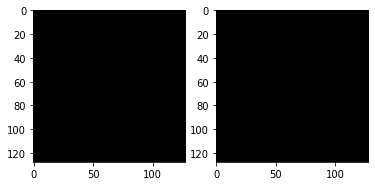

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images,masks = next(joined_generator)

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(images[0].astype(int))
fig.add_subplot(1, 2, 2)
plt.imshow(masks[0].astype(int))

In [1]:
# segmentation_models nie jest domyślnie zainstalowane w Colabie
!pip install segmentation_models

     |████████████████████████████████| 51kB 6.2MB/s 


In [ ]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [ ]:
import segmentation_models
from segmentation_models import Unet
from segmentation_models.losses import DiceLoss

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
# import segmentation_models. as smp

model_base = Unet('efficientnetb1', classes=1, activation='sigmoid', encoder_weights='imagenet', encoder_freeze=False)


inp = Input(shape=(None, None, 1))


l1 = tf.keras.layers.Conv2D(3, (1, 1))(inp) # map N channels data to 3 channels
out = model_base(l1)
model = Model(inp, out, name="model")

optimizer = tf.keras.optimizers.Adam(lr=2e-4)
loss =  DiceLoss()
model.compile(optimizer=optimizer,
                   loss=loss,
                   metrics=[segmentation_models.metrics.IOUScore(threshold=0.5),
                            segmentation_models.metrics.FScore(threshold=0.5)])


In [ ]:
model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint

training_samples = train_images_generator.n
validation_samples = val_images_generator.n

# checkpoint = ModelCheckpoint(f"/content/drive/MyDrive/ZPO_projekt/modele/{model.name}_.hdf5", monitor='val_loss', verbose=1,
    # save_best_only=True, mode='auto', period=1)

batch_size = 128
validaton_batch_size = 32

model.fit(
    train_combined_generator, 
    steps_per_epoch=training_samples // batch_size,
    validation_data = val_combined_generator,
    validation_steps = validation_samples // validaton_batch_size,
    epochs=2,
    use_multiprocessing=True,
    verbose=1,
    # callbacks = [checkpoint]
)

In [ ]:
model.save('/content/drive/MyDrive/ZPO_projekt')

In [ ]:
predictions_base_path = Path('/content/Predictions')
first_dataset_predictions_path = predictions_base_path / 'first'
second_dataset_predictions_path = predictions_base_path / 'second'

first_dataset_predictions_path.mkdir(exist_ok=True, parents=True)
second_dataset_predictions_path.mkdir(exist_ok=True, parents=True)